In [1]:
def clearall():
    all = [var for var in globals() if var[0] != "_"]
    for var in all:
        del globals()[var]
clearall()

In [ ]:
___Author___='LumberJack Jyss'
print('Global Optimized LumberJack Environment Motor 55\n°OoO_FXCM_Oo0°\nLumberJack Jyss 5779(c)')

print('Version v1.0')
print('Importing librairies...')
import fxcmpy
print('version fxcmpy :',fxcmpy.__version__)
import forexconnect
from forexconnect import fxcorepy
from forexconnect import ForexConnect, ResponseListener, Common
import time
import numpy as np
import pandas as pd
import datetime as dt
import talib
from zigzag import *
from colorama import Fore, Back, Style
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('seaborn')
%matplotlib inline

#import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,roc_curve,confusion_matrix,classification_report
print('Librairies imported')
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

def session_status_changed(session: fxcorepy.O2GSession,
                           status: fxcorepy.AO2GSessionStatus.O2GSessionStatus):
    print("Trading session status: " + str(status))
    return


#TOKEN = 'e053ac1597cef331df9429ac8151100ea9f1c411' #token demo
#TOKEN = 'e053ac1597cef331df9429ac8151100ea9f1c411' #token real
#server = 'demo'

user_id = 'D261155614'
password = '3160'
url = 'fxcorporate.com/Hosts.jsp'
accountid='01151167'

#user_id = 'D261151986'
#password = '2786'
#url = 'fxcorporate.com/Hosts.jsp'
#accountid='01147539'

#user_id = 'D261157929'
#password = '3920'
#url = 'fxcorporate.com/Hosts.jsp'
#accountid='01153482'

# minutes: 'm1' , 'm5' , 'm15' , 'm30' 
# hours: 'H1' , 'H2', 'H3', 'H4', 'H6' 'H8'
# one day: 'D1'
# one week: 'W1'
# one month: 'M1'
ticker = 'AAPL' 
period = 'm5'
number = 10000
pos_long = 0
pos_short = 0
# Time Windows
# start = dt.datetime(2017, 7, 15)
# stop = dt.datetime(2017, 8, 1)
# con.get_candles('EUR/USD', period='D1',start=start, stop=stop)

#con = fxcmpy.fxcmpy(access_token=TOKEN, log_level='error',server= server)
#if con.is_connected():
#    print('Connection established for',con.get_account_ids(),' - Mode :',server)
#else:
#    print('Not connected')
def connect():
    tmps1=time.time()
    print('Connecting server...')
    fx = ForexConnect()
    fx.login(user_id, password, url,"Demo", session_status_callback=session_status_changed)
    tmps2=round(time.time()-tmps1,2)
    print ("connected in = %f" %tmps2,'seconds')
    
    return(fx)
#df = con.get_candles(instrument=ticker, period=period,number=number) #start=start,stop=stop)

#data = pd.DataFrame()
#data['Open'] = df['askopen']
#data['High'] = df['askhigh']
#data['Low'] = df['asklow']
#data['Close'] = df['askclose']
#data['Date'] = df.index
#data = data[['Date'] + data.columns[:-1].tolist()]
#df = data.copy()

def scrap_data(ticker,period,number):
    history = fx.get_history(ticker, period,quotes_count=number)
    df = pd.DataFrame({'Date':history['Date'],'Open':history['BidOpen'],'High':history['BidHigh'],'Low':history['BidLow'],'Close':history['BidClose']})
    #df.reset_index(inplace=True,drop=True)
    df = df.dropna()
    return(df)

def prepa_data(df):
    tmps1=time.time()
    print('Preparing data...')
    rsi = talib.RSI(df['Close'],timeperiod=2)
    upper, middle, lower =  talib.BBANDS(df['Close'], timeperiod=9, nbdevup=2, nbdevdn=2,matype=0)
    sma5 = talib.SMA(df['Close'],timeperiod=5)
    sma8 = talib.SMA(df['Close'],timeperiod=8)
    sma10 = talib.SMA(df['Close'],timeperiod=10)
    sma12 = talib.SMA(df['Close'],timeperiod=12)
    sma15 = talib.SMA(df['Close'],timeperiod=15)
    sma30 = talib.SMA(df['Close'],timeperiod=30)
    sma35 = talib.SMA(df['Close'],timeperiod=35)
    sma40 = talib.SMA(df['Close'],timeperiod=40)
    sma45 = talib.SMA(df['Close'],timeperiod=45)
    sma50 = talib.SMA(df['Close'],timeperiod=50)
    atr = talib.ATR(df['High'],df['Low'],df['Close'],timeperiod=10)
    delta5_8 = sma5 - sma8
    delta8_10 = sma8 - sma10
    delta10_12 = sma10 - sma12
    delta12_15 = sma12 - sma15
    delta15_30 = sma15 - sma30
    delta30_35 = sma30 - sma35
    delta35_40 = sma35 - sma40
    delta40_45 = sma40 - sma45
    delta45_50 = sma45 - sma50
    X = df['Close']
    pivots = peak_valley_pivots(X.values, 0.001, -0.001)
    ts_pivots = pd.Series(X, index=X.index)
    ts_pivots = ts_pivots[pivots != 0]

    peak = []
    valley = []

    for i in range(0,df.shape[0]):
        if pivots[i] == 1:
            peak.append(pivots[i])
            valley.append(0)
        elif pivots[i] == -1:
            peak.append(0)
            valley.append(pivots[i])
        else:
            peak.append(0)
            valley.append(0)
    rsi5_list = []
    rsi95_list = []
    for i in range(0,df.shape[0]):
        try:
            rsi95_list.append(95 - rsi[i])
            rsi5_list.append(rsi[i] - 5)
        except:
            rsi95_list.append(0)
            rsi5_list.append(0)

    bbdelta = upper - middle
    price_bolup = df['Close'] - lower
    price_bolow = df['Close'] - upper
    Ema = talib.EMA(df['Close'],timeperiod=20)
    KC_High = Ema + 2*atr
    KC_Low = Ema - 2*atr

    varop_spy = df['Open'] - df['Close']
    varhl_spy = df['High'] - df['Low']
    df['Varop_Spy'] = varop_spy
    df['Varhl_spy'] = varhl_spy
    df['RSI'] = rsi
    df['95 - RSI'] = np.array(rsi95_list)
    df['RSI - 5'] = np.array(rsi5_list)
    df['BBD_Delta_Up'] = bbdelta
    df['delta5_8'] = delta5_8
    df['delta8_10'] = delta8_10
    df['delta10_12'] = delta10_12
    df['delta12_15'] = delta12_15
    df['delta15_30'] = delta15_30
    df['delta30_35'] = delta30_35
    df['delta35_40'] = delta35_40
    df['delta40_45'] = delta40_45
    df['delta45_50'] = delta45_50
    df['Peaks'] = abs(np.array(peak))
    df['Valley'] = abs(np.array(valley))
    df['KC_High'] = KC_High
    df['KC_Low'] = KC_Low
    df['upper'] = upper
    df['lower'] = lower
    df['var_bollup_kchigh'] = upper-KC_High
    df['var_bolllow_kclow'] = lower-KC_Low
    df = df.dropna()
    TTM_squeeze = []
    for i in range (0,49):
        TTM_squeeze.append(0)
    for i in range (49,df.shape[0]):
        if df['var_bollup_kchigh'][i]<0 and df['var_bolllow_kclow'][i]>0:
            TTM_squeeze.append(0)
        else:
            TTM_squeeze.append(1)
    df['TTM_squeeze']  = TTM_squeeze
    tsf = talib.TSF(df['Close'],timeperiod=14)
    delta_tsf = df['Close'] - tsf
    df['delta_tsf'] = tsf
    forosc = []
    forosc.append(0)
    for i in range(1,df.shape[0]):
        try:
            forosc.append((df.iloc[i,4] - tsf[i-1])*100/df.iloc[i,4])
        except:
            forosc.append(0)
    df['Forcast Oscillator'] = (forosc)
    target_up = []
    target_down = []

    for i in range(0,df.shape[0]-5):

        if (df.iloc[i+1,5] * df.iloc[i,5]) < 0 :
            if (df.iloc[i+1,4] - df.iloc[i,4]) > 0.1 :#or (df.iloc[i+1,4] - df.iloc[i,3]) > 30:
                target_up.append(1)
                target_down.append(0)
            elif (df.iloc[i+1,4] - df.iloc[i,4]) < -0.1: #or (df.iloc[i+1,4] - df.iloc[i,2]) < -30:
                target_up.append(0)
                target_down.append(1)
            else:
                target_up.append(0)
                target_down.append(0)
        else :
            target_up.append(0)
            target_down.append(0)
    target_up.append(0)
    target_down.append(0)
    target_up.append(0)
    target_down.append(0)
    target_up.append(0)
    target_down.append(0)
    target_up.append(0)
    target_down.append(0)
    target_up.append(0)
    target_down.append(0)
    df['target_up'] = target_up  # target_up # abs(np.array(valley))#target_up
    df['target_down'] = target_down # target_down # abs(np.array(peak))#target_down
    df['target_value'] = df['Close']
    df = df.drop(['Open','High','Low','Close'],axis=1)
    #df = df.copy()
    #df = df.iloc[:,1:]
    #df['Date'] = df['Date']
    df = df.dropna()
    #df = df[['Date'] + df.columns[:-1].tolist()]
    #df.reset_index(inplace=True,drop=True)
    tmps2=round(time.time()-tmps1,2)
    print ("Data prepared in = %f" %tmps2,'seconds')
    return(df)


def deep_learning(df):
    tmps1=time.time()
    X = df.iloc[:,1:-3]
    y_up = df.iloc[:,-3].values
    y_down = df.iloc[:,-2].values

    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)
    y_up = np.array(y_up).reshape(-1,1)
    y_down = np.array(y_down).reshape(-1,1)

    Xtrain = X[:bloc1,:]
    Xtest = X[bloc1:,:]
    ytrain_up = y_up[:bloc1,:]
    ytest_up = y_up[bloc1:,:]
    ytrain_down = y_down[:bloc1,:]
    ytest_down = y_down[bloc1:,:]

    seed = 770
    np.random.seed(seed)

    ytrain_up = ytrain_up.reshape(ytrain_up.shape[0],)
    ytrain_down = ytrain_down.reshape(ytrain_down.shape[0],)

    Xtrain = Xtrain.reshape(Xtrain.shape[0],Xtrain.shape[1])

    model_up = Sequential()
    # Add an input layer 
    model_up.add(Dense(23, activation='relu'))
    # Add one hidden layer 
    model_up.add(Dense(50, activation='relu'))
    # Add an output layer 
    model_up.add(Dense(1, activation='sigmoid'))

    model_down = Sequential()
    # Add an input layer 
    model_down.add(Dense(23, activation='relu'))
    # Add one hidden layer 
    model_down.add(Dense(50, activation='relu'))
    # Add an output layer 
    model_down.add(Dense(1, activation='sigmoid'))

    print('Processing move_up')
    model_up.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy','mse'])

    history_up = model_up.fit(Xtrain, ytrain_up,epochs=50, batch_size=32, verbose=0)
    print('\n')
    print('Processing move_down')
    model_down.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy','mse'])

    history_down = model_down.fit(Xtrain, ytrain_down,epochs=50, batch_size=32, verbose=0)
    print('\n')
    print('Computing done')
    print('\n')

    train_acc_up = model_up.evaluate(Xtrain, ytrain_up,verbose=1)
    train_acc_down = model_down.evaluate(Xtrain, ytrain_down,verbose=1)

    yhat_up = model_up.predict_classes(Xtest)
    yhat_down = model_down.predict_classes(Xtest)

    score_up = model_up.evaluate(Xtest, ytest_up,verbose=1)
    score_down = model_down.evaluate(Xtest, ytest_down,verbose=1)

    predict_up = model_up.predict(Xtest)
    predict_down = model_down.predict(Xtest)

    accuracy_up = accuracy_score(ytest_up, yhat_up)
    accuracy_down = accuracy_score(ytest_down, yhat_down)

    # La précision permet de mesurer la capacité du modèle à refuser résultats non-pertinents : vrais_positifs/(vrais_positifs+faux_positifs)
    precision_up = precision_score(ytest_up, yhat_up)  
    precision_down = precision_score(ytest_down, yhat_down) 


    # Recall : (vrai_positifs/(vrais_positifs+faux_négatifs))
    recall_up = recall_score(ytest_up, yhat_up) 
    recall_down = recall_score(ytest_down, yhat_down) 


    #roc_up=roc_auc_score(ytest_up,yhat_up)
    #roc_down=roc_auc_score(ytest_down,yhat_down)
    print('\n')
    print('RESULTATS UP\n')
    print('Accuracy: %.2f%%' % (accuracy_up * 100.0))
    print("Precision: %.2f%% " % (precision_up *100),' => Discrimnination des vrais positifs parmi les faux positifs')
    print("Recall: %.2f%% " % (recall_up * 100),' => Positifs trouvés par Golem sur tous les positifs existants')
    #print("ROC: %.2f%% " % (roc_up *100))
    # get probabilities for positive class

    print(classification_report(ytest_up, yhat_up))
    conf_matrix = pd.DataFrame(index = ['vrais_réels','Faux_réels'])
    conf_matrix['Vrais_estimés'] = ['Vrais_positifs','Faux_positifs']
    conf_matrix['Faux_estimés'] = ['Faux_négatif','Vrais-négatifs']
    print(confusion_matrix(ytest_up, yhat_up))

    print('\n')
    print('_______________________________________________________________________________________________________________________________________________________________\n')
    print('RESULTATS DOWN\n')
    print('Accuracy: %.2f%%' % (accuracy_down * 100.0))
    print("Precision: %.2f%% " % (precision_down *100),' => Discrimnination des vrais positifs parmi les faux positifs')
    print("Recall: %.2f%% " % (recall_down * 100),' => Positifs trouvés par Golem sur tous les positifs existants')
    #print("ROC: %.2f%% " % (roc_down *100))
    # get probabilities for positive class

    print(classification_report(ytest_down, yhat_down))
    conf_matrix = pd.DataFrame(index = ['vrais_réels','Faux_réels'])
    conf_matrix['Vrais_estimés'] = ['Vrais_positifs','Faux_positifs']
    conf_matrix['Faux_estimés'] = ['Faux_négatif','Vrais-négatifs']
    print(confusion_matrix(ytest_down, yhat_down))
    print('\n')

    resultats_test = pd.DataFrame()
    resultats_test['Date'] = df.iloc[bloc1:,0]
    resultats_test['Move Up'] = yhat_up
    resultats_test['Confiance up'] = (predict_up)*100
    resultats_test['Move Down'] = yhat_down
    resultats_test['Confiance Down'] = (predict_down)*100
    resultats_test['Actual'] = df['target_value']

    tmps2=round(time.time()-tmps1,2)
    print ("Deep Learning executed in = %f" %tmps2,'seconds')
    #resultats.set_index('Date',inplace=True)
    #parse_dates=resultats['Date']
    return(resultats_test,precision_up,precision_down,model_up,model_down,scaler)

def learn(df):
    resultats_test,precision_up,precision_down,model_up,model_down,scaler = deep_learning(df)
    return(resultats_test,precision_up,precision_down,model_up,model_down,scaler)


global fx,delta,bloc1,bloc2
fx = connect()

tmps1=time.time()
print('Scraping data...')
history = fx.get_history(ticker, period,quotes_count=number)
df = scrap_data(ticker,period,number)
tmps2=round(time.time()-tmps1,2)
print ("executed in = %f" %tmps2,'seconds')

print('\n')
print('GOLEM begins Computing...')
print('\n')
delta = round(df.shape[0])
bloc1 = round(delta*0.80)
bloc2 = delta - bloc1
print("# of periods : ",delta)
print('On 80% - 20% slash : ')
print('Bloc 1 : ',bloc1,'\nBloc 2 :',bloc2,' periods ')
print('First period :',df.iloc[0,0])
print('Split period :',df.iloc[bloc1-1,0])
print('Last period :',df.iloc[df.shape[0]-1,0])
print('\n')

df = prepa_data(df)

resultats_test,precision_up,precision_down,model_up,model_down,scaler = learn(df)

while precision_up < 0.65 or precision_down < 0.7 :
    print('Precision test failed. Deeping once again')
    resultats_test,precision_up,precision_down,model_up,model_down,scaler = learn(df)
    
print('Begining testing live values')
print('Instrument :', ticker)
table_manager = fx.table_manager
trades_table = table_manager.get_table(fx.TRADES)

side = ''

timer = scrap_data(ticker, period,number=1).iloc[-1,0].minute + 5

if timer > 55 :
    timer = 60

#################
#### LOOPING ####
#################

for loop in range(0,10000):
    #print(' \n INFRA LOOP ',loop,'\n')
    
    last = scrap_data(ticker, period,number=1)
    
    if timer >= 65:
        timer = 0
    
    if last.iloc[-1,0].minute < timer :
        for row in trades_table:
            trade =None
            side = row['buy_sell']
            pnl = row['pl']
            trade_id = row['trade_id']
            open_rate = row['open_rate']
            should_close = row['close']
            amount = row['amount']
            print('\r Side',side,'pnl : ',pnl,'Trade_ID : ',trade_id,'Open_Rate',open_rate,'Amount',amount,end='')
            time.sleep(0.5)
        print('\r \033[43m'+' Tempo '+'\033[0m'+'\033[46m'+'...'+'\033[0m',end='')
        if pos_long == 1:
            if pnl > 0 :
                print('\033[42m pnl : ',round(pnl,2),'\033[0m',end='', flush=True)
            elif pnl < 0:
                print('\033[41m pnl : ',round(pnl,2),'\033[0m',end='', flush=True)
        elif pos_short == 1:
            if pnl > 0 :
                print('\033[42m pnl : ',round(pnl,2),'\033[0m',end='', flush=True)
            elif pnl < 0:
                print('\033[41m pnl : ',round(pnl,2),'\033[0m',end='', flush=True)
            time.sleep(0.5)
        else:
            print ('\033[36m', dt.datetime.now().hour-2,'H',dt.datetime.now().minute,'min',dt.datetime.now().second,'sec',Style.RESET_ALL,end='',flush=True)
            time.sleep(0.5)
        continue
    else :
        
        timer = timer + 5
        
####################        
### MAJ DES DATA ###
###################

        #df = df.iloc[1:,:]
        #df = df.append({'Date':last.iloc[-1,0],'Open':last.iloc[-1,1], 'High':last.iloc[-1,2],'Low':last.iloc[-1,3], 'Close':last.iloc[-1,4]}, ignore_index=True)
        df_live = pd.DataFrame()
        df_live = scrap_data(ticker,period,number=10000)

        rsi = talib.RSI(df_live['Close'],timeperiod=2)
        aroondown, aroonup = talib.AROON(df_live['High'], df_live['Low'], timeperiod=9)
        aroon = aroonup - aroondown #(aroonup-aroondown)/abs((aroonup-aroondown))

        
# PREPARATION DES DATA
        df_live = prepa_data(df_live)
        
        print('Mise à jour des data')
        print('Loop : ',loop)
        print('Timer : ',timer)
        print('len df_live: ',len(df_live))
        print('Aroon Up : ',aroonup.iloc[-1])
        print('Aroon Down : ',aroondown.iloc[-1])
        print('Delta Aroon : ',aroon.iloc[-1])
        print('RSI : ',rsi.iloc[-1])

# TRANSFORMATION DES DATA
        X = df_live.iloc[:,1:-3]
        X = scaler.fit_transform(X)
        Xtest = X[-1:,:]
        seed = 770
        np.random.seed(seed)
        yhat_up = model_up.predict_classes(Xtest)
        yhat_down = model_down.predict_classes(Xtest)
        predict_up = model_up.predict(Xtest)
        predict_down = model_down.predict(Xtest)
        #resultats_live = pd.DataFrame()
        #resultats_live['Date'] = df.iloc[-1,0].strftime("%Y-%m-%d %H:%M:%S")
        #resultats_live['Move Up'] = yhat_up[-1]
        #resultats_live['Confidence up'] = (predict_up)[-1]*100
        #resultats_live['Move Down'] = yhat_down[-1]
        #resultats_live['Confidence Down'] = (predict_down)[-1]*100
        #resultats_live['Actual'] = df.iloc[-1,-1]
        tmps2=round(time.time()-tmps1,2)
        print ("Testing executed in = %f" %tmps2,'secondes')
        print('Time of request', Fore.BLUE)
        print(dt.datetime.now().hour-2,'H',dt.datetime.now().minute,'min',dt.datetime.now().second,'seconds',Style.RESET_ALL)
        print('\033[45m')
        print('Date : ',df_live.iloc[-1,0].strftime("%Y-%m-%d %H:%M:%S"))
        print('Move Up : ',yhat_up[-1][-1])
        print('Confidence Up : ',predict_up[-1][-1]*100)
        print('Move Down : ',yhat_down[-1][-1])
        print('Confidence Down : ',predict_down[-1][-1]*100)
        print(Style.RESET_ALL)

##################
#### ACTIONS ####
#################
        
    
        ######################
        ###### TESTING ######
        #####################
        
        try:    
            for row in trades_table:
                trade =None
                side = row['buy_sell']
                pnl = row['pl']
                trade_id = row['trade_id']
                open_rate = row['open_rate']
                should_close = row['close']
                amount = row['amount']
                
            if side == 'B'and amout == 30:
                pos_long = 1
            if side == 'S'and amount == 30:
                pos_short = 1

            if pos_long == 1:
                if pnl > 0 :
                    print('\033[42m pnl : ',round(pnl,2),'\033[0m')
                elif pnl < 0:
                    print('\033[41m pnl : ',round(pnl,2),'\033[0m')
            elif pos_short == 1:
                if pnl > 0 :
                    print('\033[42m pnl : ',round(pnl,2),'\033[0m')
                elif pnl < 0:
                    print('\033[41m pnl : ',round(pnl,2),'\033[0m')
        except:
            side = ''
            pass
        
        
        ######################
        ##### SIGNAL UP #####
        #####################
        if pos_long == 0 and pos_short == 1  and ((aroonup.iloc[-1] < 20 and aroondown.iloc[-1] > 90 and rsi.iloc[-1] < 30 ) or abs(aroon.iloc[-1]) < 10):
            buysell = 'B'
            print('RSI : ',rsi.iloc[-1])
            print('Aroon Up : ',aroonup.iloc[-1])
            print('Aroon Down : ',aroondown.iloc[-1])
            print('Delta Aroon : ',aroon.iloc[-1])
            try:
                request_close = fx.create_order_request(
                   order_type='CM',
                   ACCOUNT_ID=accountid,
                    OFFER_ID = offerid,
                   BUY_SELL=buysell,
                   AMOUNT=amount,
            TIME_IN_FORCE='IOC',
            TRADE_ID = trade_id
               )
                resp_close = fx.send_request(request_close)
                time.sleep(2)
                closed_table = table_manager.get_table(fx.CLOSED_TRADES)
                for row in closed_table:
                    trade =None
                    side = row['buy_sell']
                    pnl = row['pl']
                    trade_id = row['trade_id']
                    open_rate = row['open_rate']
                    amount = row['amount']
                    open_time = row['open_time']
                    close_rate = row['close_rate']
                    close_time = row['close_time']

                print('\033[47m \033[31m Close Short avec un pnl de', pnl,'\033[0m')
                print('Résumé : ')
                print(' Open date : ', open_time)
                print('Open Rate : ',open_rate)
                print('Amount : ',amount)
                print('Close date : ',close_time)
                print('Close Rate : ',close_rate)
                print('')
                pos_short = 0
                continue
            except:
                    print("WARNING! It wasn't possible to close the position" )
                    continue
    if  pos_long == 0 and pos_short == 0  and ((aroonup.iloc[-1] < 20 and aroondown.iloc[-1] > 90 and rsi.iloc[-1] < 30 )) :
        buysell = 'B'
        try:
            request_open = fx.create_order_request(SYMBOL=ticker,
           order_type='OM',
           ACCOUNT_ID=accountid,
           BUY_SELL=buysell,
           AMOUNT=30,
    TIME_IN_FORCE='IOC'
       )
            resp_open = fx.send_request(request_open)
            time.sleep(2)
            order_id = resp_open.order_id
            offer = Common.get_offer(fx,ticker)
            offerid = offer.offer_id
            table_manager = fx.table_manager
            trades_table = table_manager.get_table(fx.TRADES)
            for row in trades_table:
                trade =None
                side = row['buy_sell']
                pnl = row['pl']
                trade_id = row['trade_id']
                open_rate = row['open_rate']
                should_close = row['close']
                amount = row['amount']
            print('Side',side,'pnl : ',pnl,'Trade_ID : ',trade_id,'Open_Rate',open_rate,'Amount',amount)

            print('Résumé : ')
            print(' Open date : ', open_time)
            print('Open Rate : ',open_rate)
            print('Amount : ',amount)
            print('pnl : ',pnl)
            print('                                                     Go Long!')
            print('')
            pos_long = 1
        except:
            print("WARNING! It wasn't possible to open the position - Price instability detected - " )
            continue

    ######################
    #### SIGNAL DOWN ####
    #####################
        if  pos_long == 1 and pos_short == 0  and ((aroondown.iloc[-1] < 20 and aroondup.iloc[-1] > 90 and rsi.iloc[-1] > 70 ) or abs(aroon.iloc[-1]) < 10):
            buysell = 'S'
            print('RSI : ',rsi.iloc[-1])
            print('Aroon Up : ',aroonup.iloc[-1])
            print('Aroon Down : ',aroondown.iloc[-1])
            print('Delta Aroon : ',aroon.iloc[-1])
            try:
                request_close = fx.create_order_request(
                   order_type='CM',
                   ACCOUNT_ID=accountid,
                    OFFER_ID = offerid,
                   BUY_SELL=buysell,
                   AMOUNT=amount,
            TIME_IN_FORCE='IOC',
            TRADE_ID = trade_id
               )
                resp_close = fx.send_request(request_close)
                time.sleep(2)
                closed_table = table_manager.get_table(fx.CLOSED_TRADES)
                for row in closed_table:
                    trade =None
                    side = row['buy_sell']
                    pnl = row['pl']
                    trade_id = row['trade_id']
                    open_rate = row['open_rate']
                    amount = row['amount']
                    open_time = row['open_time']
                    close_rate = row['close_rate']
                    close_time = row['close_time']

                print('\033[47m \033[31m Close Short avec un pnl de', pnl,'\033[0m')
                print('Résumé : ')
                print(' Open date : ', open_time)
                print('Open Rate : ',open_rate)
                print('Amount : ',amount)
                print('Close date : ',close_time)
                print('Close Rate : ',close_rate)
                print('')
                pos_long = 0
                continue
            except:
                    print("WARNING! It wasn't possible to close the position" )
                    continue
    if  pos_long == 0 and pos_short == 0  and ((aroondown.iloc[-1] < 20 and aroonup.iloc[-1] > 90 and rsi.iloc[-1] > 70 )) :
        buysell = 'B'
        try:
            request_open = fx.create_order_request(SYMBOL=ticker,
           order_type='OM',
           ACCOUNT_ID=accountid,
           BUY_SELL=buysell,
           AMOUNT=30,
    TIME_IN_FORCE='IOC'
       )
            resp_open = fx.send_request(request_open)
            time.sleep(2)
            order_id = resp_open.order_id
            offer = Common.get_offer(fx,ticker)
            offerid = offer.offer_id
            table_manager = fx.table_manager
            trades_table = table_manager.get_table(fx.TRADES)
            for row in trades_table:
                trade =None
                side = row['buy_sell']
                pnl = row['pl']
                trade_id = row['trade_id']
                open_rate = row['open_rate']
                should_close = row['close']
                amount = row['amount']
            print('Side',side,'pnl : ',pnl,'Trade_ID : ',trade_id,'Open_Rate',open_rate,'Amount',amount)

            print('Résumé : ')
            print(' Open date : ', open_time)
            print('Open Rate : ',open_rate)
            print('Amount : ',amount)
            print('pnl : ',pnl)
            print('                                                     Go Long!')
            print('')
            pos_short = 1
        except:
            print("WARNING! It wasn't possible to open the position - Price instability detected - " )
            continue

    ####################
    #### NO SIGNAL ####
    ###################
    else:
        print('No signal \n')
        continue
############
### END ###
###########

Global Optimized LumberJack Environment Motor 55
°OoO_FXCM_Oo0°
LumberJack Jyss 5779(c)
Version v1.0
Importing librairies...


In [3]:
timer,last.iloc[-1,0].minute

(60, 20)

NameError: name 'resultats' is not defined

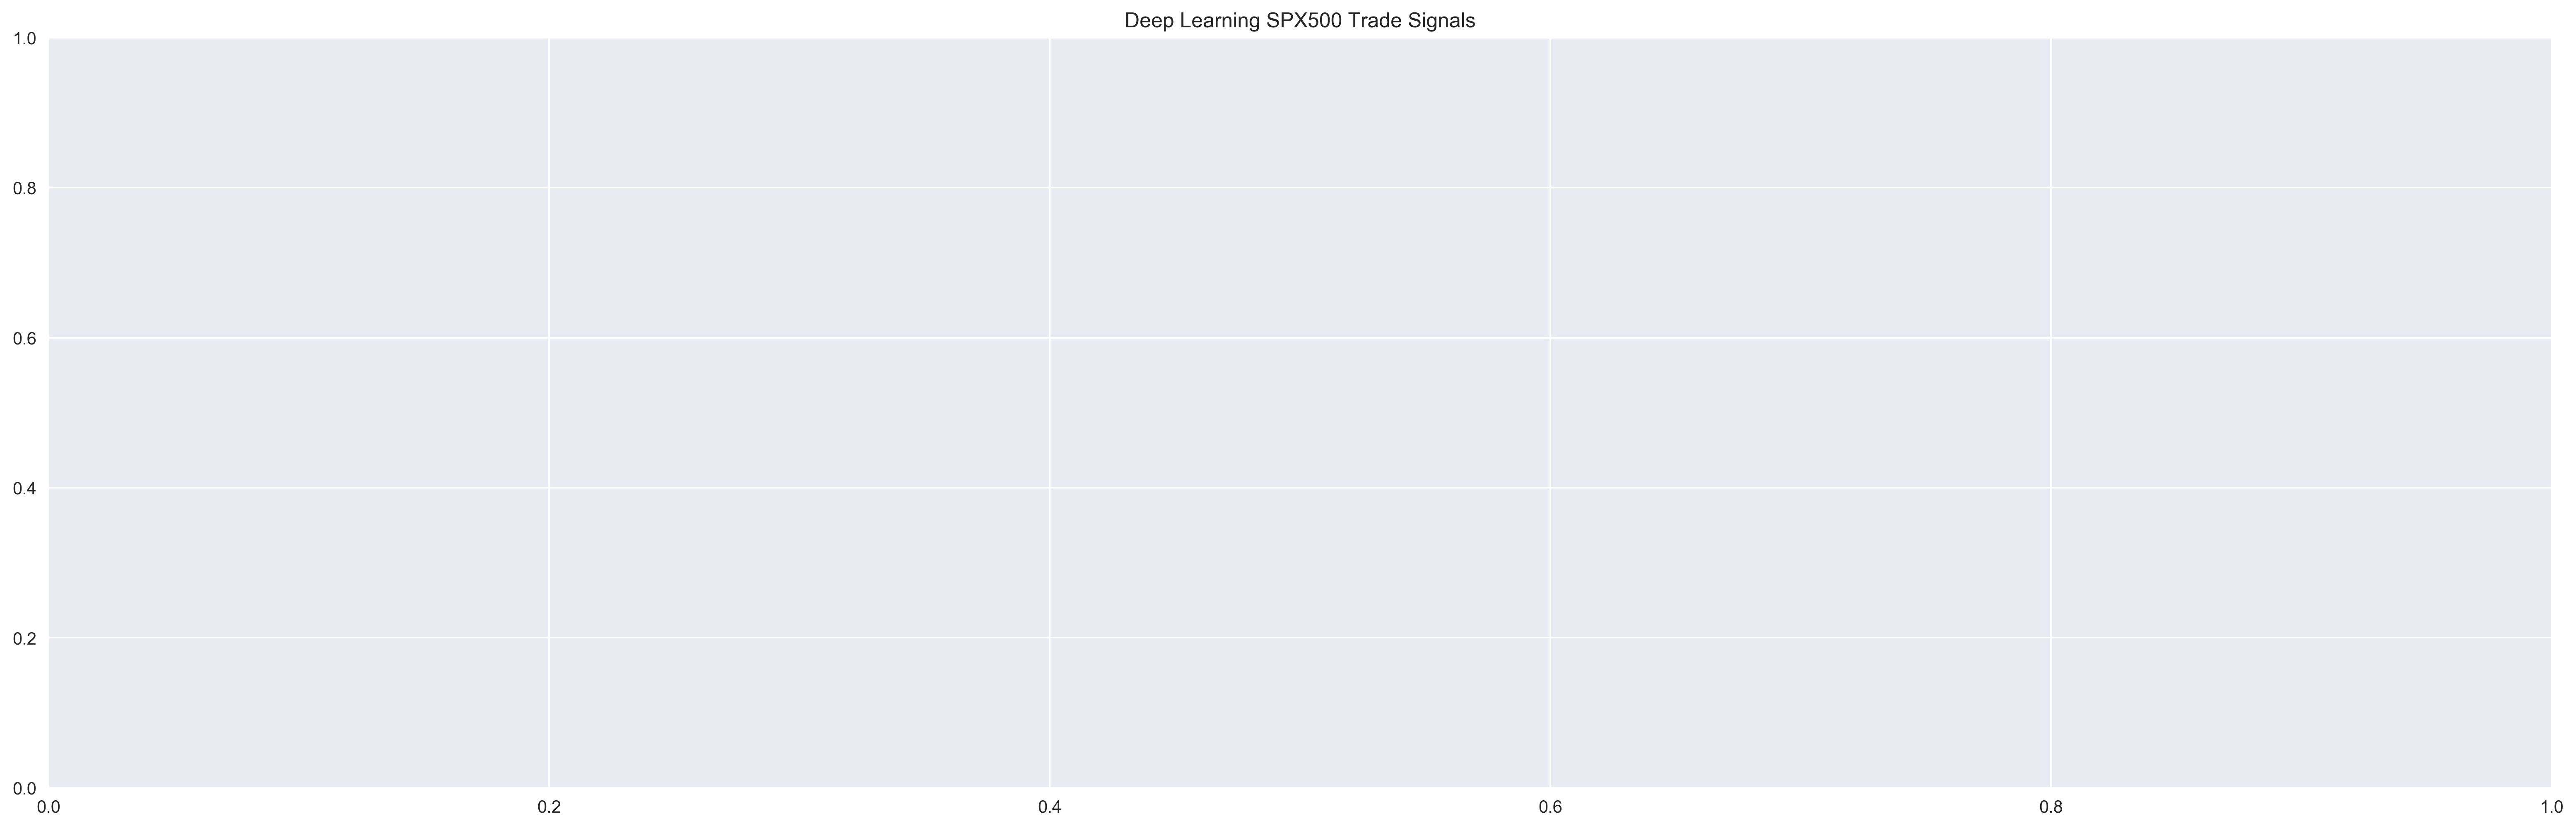

In [4]:

####################
#### TEST PLOT ####
###################


plt.figure(figsize=(26,8),dpi=300)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.title('Deep Learning '+ticker+' Trade Signals')
plt.plot(resultats['Actual'],color='purple',lw=0.9)
a = -1
for i in range(0,len(resultats)):
    a+=1
    if resultats.iloc[a,1] == 1:
        plt.scatter(x=resultats.index[i],y=resultats.iloc[i,5],c='g',marker='o')
    elif resultats.iloc[a,3] == 1:
        plt.scatter(x=resultats.index[i],y=resultats.iloc[i,5],c='r',marker='o')

plt.scatter(x=resultats.index[i],y=resultats.iloc[i,5],c='g',marker='o',label='Buy Signal')
plt.scatter(x=resultats.index[i],y=resultats.iloc[i,5],c='r',marker='o',label='Sell Signal')
plt.legend()

plt.figure(figsize=(26,8),dpi=300)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.title('Deep Learning '+ticker+' Trade Signals')
plt.plot(resultats['Actual'],color='orange',lw=0.8)
a = -1
proba = 92
for i in range(0,len(resultats)):
    a+=1
    if resultats.iloc[a,1] == 1 and resultats.iloc[i,2] >= proba:
        plt.text(x=resultats.index[i],y=resultats.iloc[i,5],s=(round(resultats.iloc[i,2]),'%'), horizontalalignment = 'center', verticalalignment = 'center',
                bbox=dict(facecolor='green', alpha=0.5))
    elif resultats.iloc[a,3] == 1and resultats.iloc[i,4] >= proba:
        plt.text(x=resultats.index[i],y=resultats.iloc[i,5],s=(round(resultats.iloc[i,4]),'%'), horizontalalignment = 'center', verticalalignment = 'center',
                bbox=dict(facecolor='red', alpha=0.5))
plt.legend()


a = -1
pos_long = 0
pos_short = 0
pactol = 100000
price_buy = 0
price_sell = 0
x = 0
winners = []
loosers = []
nb_win = 0
nb_los = 0
mini_pnl = 0
pos_duration = []
average_duration = resultats.iloc[0,0] - resultats.iloc[0,0]
proba = 80


for i in range(0,len(resultats)):
    a+=1
    if pos_long == 0 and pos_short == 0 and resultats.iloc[a,1] == 1 and resultats.iloc[a,2] > proba:
        pos_long = 1
        x = 100000/resultats.iloc[a,5]
        #pactol = pactol - (x * resultats.iloc[a,5])
        price_buy = resultats.iloc[a,5]
        time_enter = resultats.iloc[a,0]
        print('\n Le ',str(resultats.iloc[a,0]),', achat de ',x,' actions à',resultats.iloc[a,5],'$')
        print('Nouveau pactol : ',pactol)
    
    elif pos_long == 1 and resultats.iloc[a,3] == 1 and resultats.iloc[a,4] > proba:
        old_pactol = pactol
        #pactol = pactol + (x * resultats.iloc[a,5])
        
        price_sell = resultats.iloc[a,5]
        mini_pnl = x*(price_sell-price_buy)
        pactol = pactol + mini_pnl
        print('\n Le ',str(resultats.iloc[a,0]),', vente pour close de ',x,' actions à',resultats.iloc[a,5],'$')
        print('Nouveau pactol : ',pactol)
        print('pnl:', mini_pnl)
        print('prixe de vente',price_sell)
        print('prix d achat',price_buy)
        #mini_pnl = pactol - old_pactol - 100000
        
        pos_duration.append(resultats.iloc[a,0] - time_enter)
        price_buy=0
        if mini_pnl > 0:
            winners.append(mini_pnl)
            mini_pnl = 0
            nb_win +=1
        else :
            loosers.append(mini_pnl)
            mini_pnl = 0
            nb_los +=1
        pos_short = 1
        x = 100000/resultats.iloc[a,5]
        #pactol = pactol - (x * resultats.iloc[a,5])
        time_enter = resultats.iloc[a,0]
        print('\n Le ',str(resultats.iloc[a,0]),', vente de ',x,' actions à',resultats.iloc[a,5],'$')
        print('Nouveau pactol : ',pactol)
        pos_long = 0
        #x = 0
        
    elif pos_short == 0 and pos_long == 0 and resultats.iloc[a,3] == 1 and resultats.iloc[a,4] > proba:
        pos_short = 1
        x = 100000/resultats.iloc[a,5]
        price_sell = resultats.iloc[a,5]
        #pactol = pactol - (x * resultats.iloc[a,5])
        time_enter = resultats.iloc[a,0]
        print('\n Le ',str(resultats.iloc[a,0]),', vente de ',x,' actions à',resultats.iloc[a,5],'$')
        print('Nouveau pactol : ',pactol)
    
    elif pos_short == 1 and resultats.iloc[a,1] == 1 and resultats.iloc[a,2] > proba:
        old_pactol = pactol
        #pactol = pactol + (x * resultats.iloc[a,5])
     
        price_buy=resultats.iloc[a,5]
        mini_pnl = x*(price_sell-price_buy)
        pactol = pactol + mini_pnl
        print('\n Le ',str(resultats.iloc[a,0]),', achat pour close de ',x,' actions à',resultats.iloc[a,5],'$')
        print('Nouveau pactol : ',pactol)
        
        print('prixe de vente',price_sell)
        print('prix d achat',price_buy)
        #mini_pnl = pactol - old_pactol - 100000
        
        print('pnl:', mini_pnl)
        pos_duration.append(resultats.iloc[a,0] - time_enter)
        if mini_pnl > 0:
            winners.append(mini_pnl)
            mini_pnl = 0
            nb_win +=1
        else :
            loosers.append(mini_pnl)
            mini_pnl = 0
            nb_los +=1
        pos_long = 1
        x = 100000/resultats.iloc[a,5]
        #pactol = pactol - (x * resultats.iloc[a,5])
        time_enter = resultats.iloc[a,0]
        print('\n Le ',str(resultats.iloc[a,0]),', achat de ',x,' actions à',resultats.iloc[a,5],'$')
        print('Nouveau pactol : ',pactol)
        pos_short = 0
        #x = 0

        
if pos_long == 1:
    print('Cutting non resolved position')
    x = round(100000/resultats.iloc[a,5])
    #pactol = pactol + (x * resultats.iloc[a,5])
    #mini_pnl = pactol - old_pactol - 100000
    price_sell = resultats.iloc[a,5]
    mini_pnl = x*(price_sell-price_buy)
    pactol = pactol + mini_pnl
    print('pnl',mini_pnl)
    if mini_pnl > 0:
        winners.append(mini_pnl)
        mini_pnl = 0
        nb_win +=1
    else :
        loosers.append(mini_pnl)
        mini_pnl = 0
        nb_los +=1
    x = 0

if pos_short == 1:
    print('Cutting non resolved position')
    x = round(100000/resultats.iloc[a,5])
    #pactol = pactol + (x * resultats.iloc[a,5])
    #mini_pnl = pactol - old_pactol - 100000
    price_buy=resultats.iloc[a,5]
    mini_pnl = x*(price_sell-price_buy)
    pactol = pactol + mini_pnl
    print('pnl',mini_pnl)
    
    if mini_pnl > 0:
        winners.append(mini_pnl)
        mini_pnl = 0
        nb_win +=1
    else :
        loosers.append(mini_pnl)
        mini_pnl = 0
        nb_los +=1
    x = 0    


for t in range(0,len(pos_duration)):
    average_duration = average_duration + pos_duration[t]
average_duration = average_duration/(nb_los+nb_win)
               

pnl = round(pactol - 100000,2)
print('\n Begining of BackTest :',resultats.iloc[0,0])
print('Instrument :',ticker)
print('Face value per trade : $100,000')
print('End of BackTest :',resultats.iloc[-1,0])
duration = resultats.iloc[-1,0] - resultats.iloc[0,0]
print("BackTest's period :",duration)
print( 'pnl :',pnl,'$')
print('Total winners :',round(sum(winners),2),'$')
print('Total loosers :',round(sum(loosers),2),'$')
print('Number of winners :',nb_win)
print('Number of loosers :',nb_los)
print('% winners :', round((nb_win/(nb_win+nb_los) * 100),2),'%')
print('Average winners :',(round(sum(winners)/(nb_win))))
try:
    print('Average losers :',(round(sum(loosers)/(nb_los))))
except:
    print('Average losers : Inf')
print('Average Duration :', average_duration)
print('Profit Factor : ',abs(round((sum(winners)/sum(loosers)),2)))

In [ ]:
last.iloc[-1,0]